In [58]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
import networkx as nx
import scipy
from itertools import product
plt.rcParams["font.family"] = "Times new roman"


## pre-allocate operators

In [59]:

N = 6
si = qeye(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()

sx_list = []
sy_list = []
sz_list = []

for n in range(N):
    op_list = []
    for m in range(N):
        op_list.append(si)

    op_list[n] = sx
    sx_list.append(tensor(op_list))

    op_list[n] = sz
    sz_list.append(tensor(op_list))

## initialize the Hamiltonian H0

In [60]:
H0 = 0
for n in range(N):
    H0 +=  -0.5 * sx_list[n]
    

    
psi0 = H0.groundstate()[-1]
#psi_list = [basis(2, 0) for n in range(N)]
#psi0 = tensor(psi_list)

## Set the Modularity Matrix

In [61]:
def adjacency_matrix(graph):

    num_nodes = len(graph)
    adj_matrix = np.zeros((num_nodes,num_nodes))

    for node, neighbors in graph.items():
        for neighbor in neighbors:
            adj_matrix[node-1][neighbor-1] = 1
    
    return adj_matrix


graph1 = {
    1: [2, 3],
    2: [4, 1,3],
    3: [1,2],
    4: [2,5,6],
    5: [4,6],
    6: [4,5],}
    

def Modularity_Matrix(N):
    B = np.zeros((N,N))
    A = np.array(adjacency_matrix(graph1))
    m = np.sum(A)/2
    for i in range(N):
        ki = np.sum(A[i])
        for j in range(N):
            kj = np.sum(A[j])
            B[i,j]+= A[i,j]-ki*kj /(2*m)
            
    return B
                

## initialize problem hamiltonian H1 

In [62]:
# zero = basis(2,1)
# one = basis(2,0)
# q = tensor(one,tensor(one,tensor(one,tensor(zero,tensor(zero,zero)))))
# q ==H1.eigenstates()[1][0]

In [63]:
B = Modularity_Matrix(N)
H1 = 0
for i in range(N):
    for j in range(N):
        if i == j:
            
            H1 -=1.0  * np.pi*B[i,j] *sz_list[i]
        else:
            H1 -=1.0 * 2 * np.pi*B[i,j] * sz_list[i]*sz_list[j]



In [64]:
#adjacency_matrix(graph1)

## Adiabatic dynamics H(t) = (1-u(t))H0 + u(t)H1

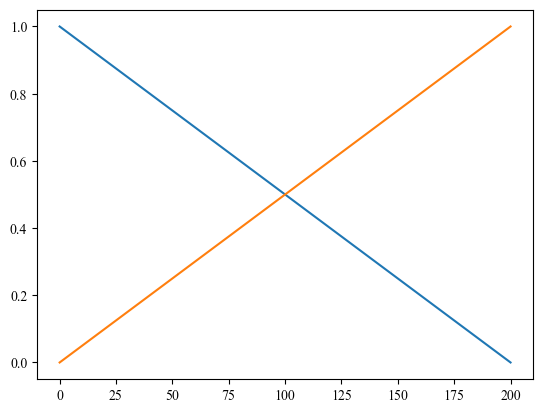

In [65]:
slope = .006
taumax =200
taulist = np.linspace(0, taumax, 100)
args = {"t_max": max(taulist)}

def u1(t,args):
    return 1- t/args["t_max"]


def u2(t,args):
    return t/args["t_max"]

plt.plot(taulist,u1(taulist,args))
plt.plot(taulist,u2(taulist,args))

In [66]:
def Hamiltonian(t,args):
    return H0 *u1(t,args)/2+ H1* u2(t,args)/2


In [67]:
H_t = [[H0,u1],[H1,u2]] 

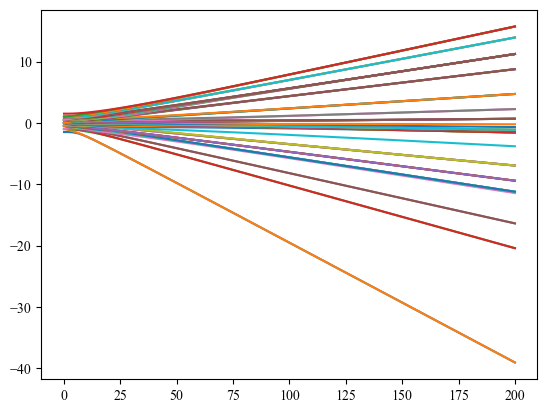

In [68]:
#result = mesolve(H_t, psi0, taulist, [], [], args)
# Extract eigenvalues

def Hamiltonian(t,args):
    return H0 *u1(t,args)/2+ H1* u2(t,args)/2

eigenvalues = np.zeros((len(taulist), 2**N))
for i, t in enumerate(taulist):
    H =Hamiltonian(t,args)
    eigenvalues[i, :] = H.eigenenergies()
    

# Plot the eigenvalues as functions of time
# plt.plot(taulist, eigenvalues[:,0], label="Eigenvalue 1")
# plt.plot(taulist, eigenvalues[:,1], label="Eigenvalue 2")
# plt.plot(taulist, eigenvalues[:,2], label="Eigenvalue 3")
# plt.xlim(0,20)
# plt.ylim(-5,0)
# plt.xlabel('Time')
# plt.ylabel('Eigenvalues')
#plt.legend()
#plt.title('Time-dependent Eigenvalues of the Hamiltonian')
plt.show()
plt.plot(taulist, eigenvalues[:], label="Eigenvalue 1")

In [69]:
H_t = [[H0,u1],[H1,u2]] 
e_ops = []
result = mesolve(H_t, psi0, taulist, [], [], args)
fidelity(result.states[-1],1/np.sqrt(2) * (H1.eigenstates()[1][0]+H1.eigenstates()[1][1]))


np.float64(0.9956894784940142)

## find the community with respect to the measurment 

In [70]:
def State_Thick(N):

    # Define the digits
    digits = [0, 1]

    # Generate all combinations
    combinations = product(digits, repeat=N)
    lst = []
    # Print all combinations
    for combination in combinations:
        a = (''.join(map(str, combination)))
        lst.append(a)
    return lst





In [71]:
def Plot_State_prob(N):
    coeff = []
    for a_i in result.states[-1].full():
        coeff.append(np.abs(a_i[0])**2)


    plt.figure(figsize=(20,5))
    plt.bar(State_Thick(N),coeff)
    plt.xticks(fontsize = 15,rotation=90)
    plt.yticks(fontsize = 20)
    plt.ylabel('Probability',fontsize = 20)
    plt.title('Final states Probability',fontsize = 20)
    plt.show()


    coeff = []
    for a_i in psi0.full():
        coeff.append(np.abs(a_i[0])**2)



    plt.figure(figsize=(20,5))
    plt.bar(State_Thick(N),coeff)
    plt.xticks(fontsize = 15,rotation=90)
    plt.yticks(fontsize = 20)
    plt.ylabel('Probability',fontsize = 20)
    plt.title('Initial states Probability',fontsize = 20)
    plt.show()

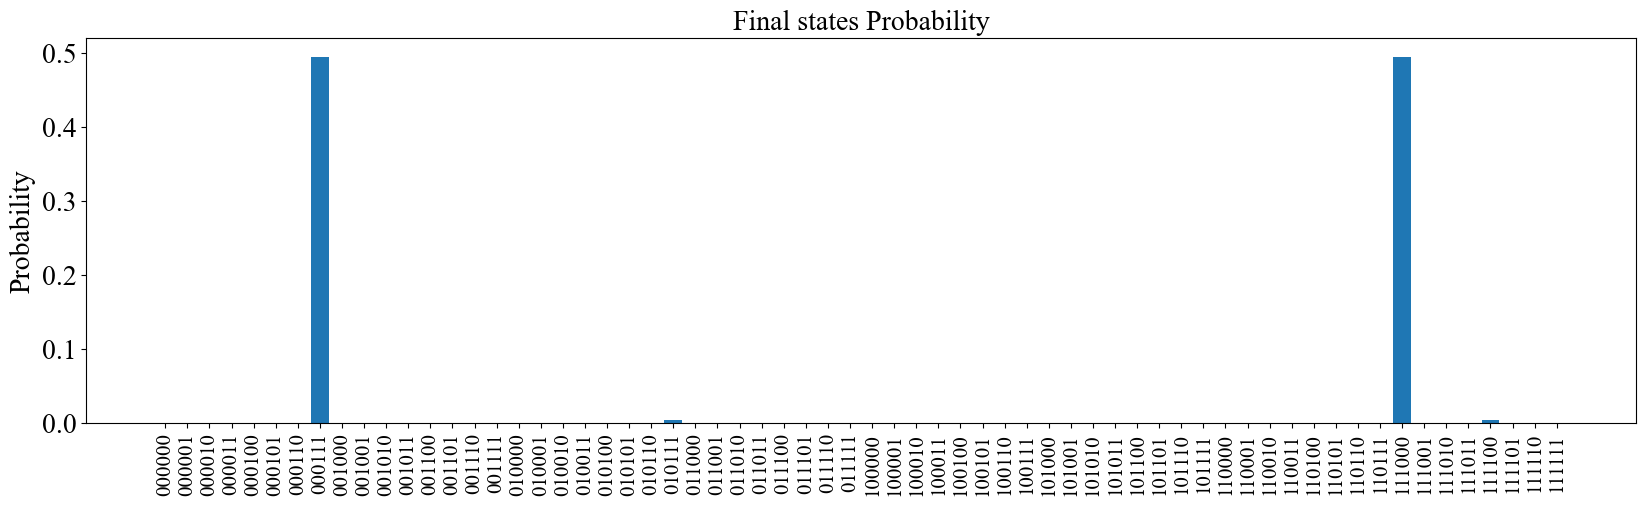

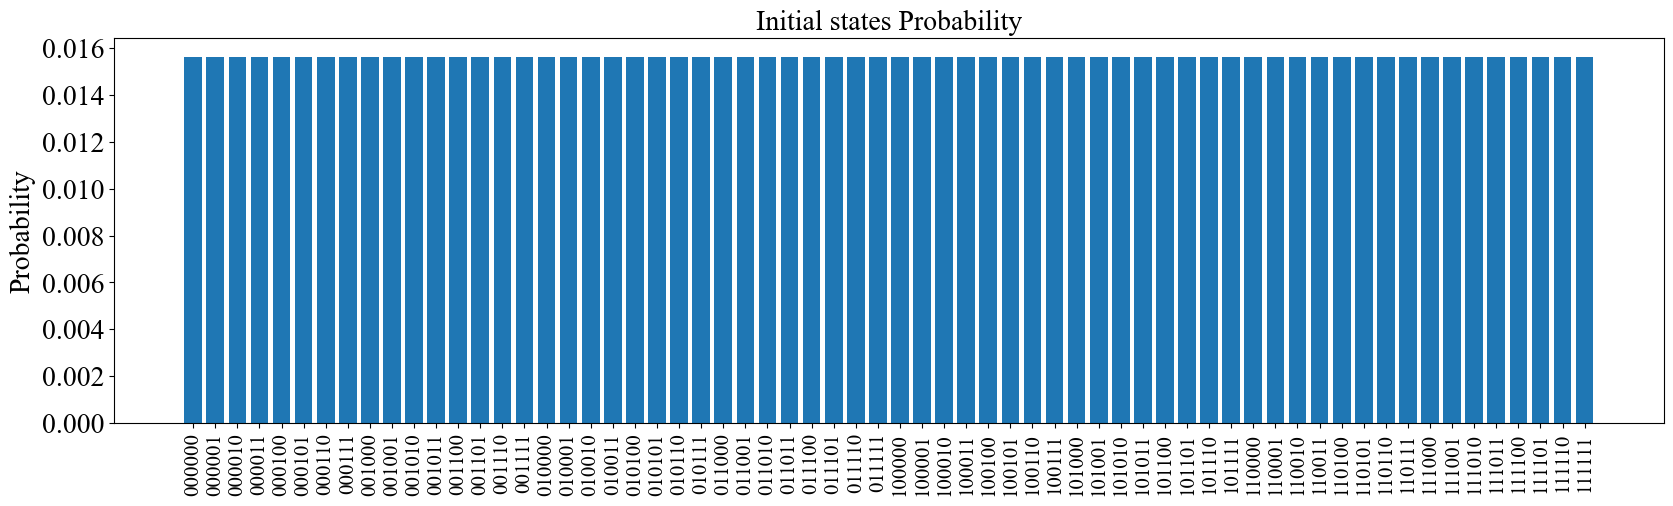

In [72]:
Plot_State_prob(N)

# using networkx Python package for community detection

[[3, 1, 5], [3, 2], [4, 2], [4, 5]]

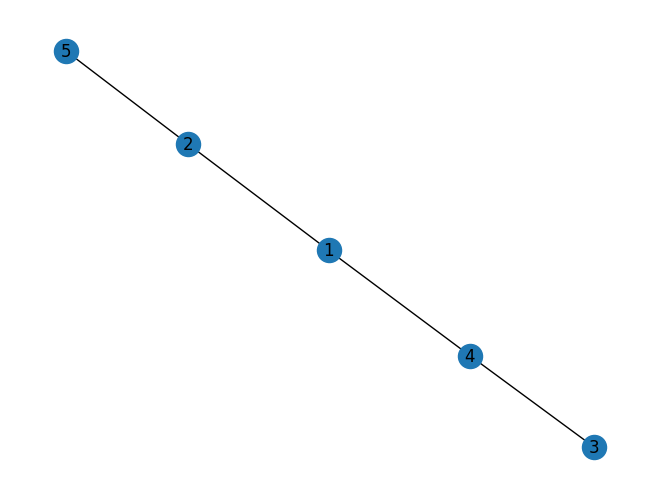

In [73]:
# importing networkx 
import numpy as np
import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt
 
g = nx.Graph()
 
# g.add_edge(1, 2)
# g.add_edge(1, 3)
# g.add_edge(2, 3)
# g.add_edge(2, 4)
# g.add_edge(5, 4)
# g.add_edge(6, 5)
# g.add_edge(6, 4)
# nx.draw(g,)

# g.add_edge(1, 2)
# g.add_edge(1, 4)
# g.add_edge(2, 5)
# g.add_edge(3, 4)

# nx.draw(g, with_labels=True)





# Create an empty graph
g = nx.Graph()

# Define the edge set
edge_set = [(1, 2), (1, 4), (2, 5), (3, 4)]

# Add edges to the graph
for i, j in edge_set:
    g.add_edge(i, j)


nx.draw(g, with_labels=True)
g_ =nx.complement(g)
list(nx.find_cliques(g_))

In [74]:
# adj_matrix = nx.adjacency_matrix(g)
# adj_matrix
# print(adj_matrix.todense())

In [75]:
# adjacency_matrix(graph1) == adj_matrix

In [76]:
nx.community.louvain_communities(G)

NameError: name 'G' is not defined

In [ ]:
#nx.modularity_matrix(g, nodelist=None, weight=None)

In [ ]:
# Modularity_Matrix(N) == nx.modularity_matrix(g, nodelist=None, weight=None)

In [9]:
nx.approximation.maximum_independent_set(g)


{1, 6}

In [122]:
# graph1 = {
#     1: [2, 4],
#     2: [1,3],
#     3: [2,4],
#     4: [1,3,5],
#     5: [4,6],
#     6: [5]}
    
# adjacency_matrix(graph1)

In [123]:
# print(adj_matrix.todense())

## MIS problem 

In [77]:
import numpy as np
from qutip import*
import matplotlib.pyplot as plt
import networkx as nx
N =4
zero = basis(2,0)
one = basis(2,1)
si = qeye(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()

sx_list = []
sy_list = []
sz_list = []
one_list = []

for n in range(N):
    op_list = []
    for m in range(N):
        op_list.append(si)

    op_list[n] = sx
    sx_list.append(tensor(op_list))

    op_list[n] = sz
    sz_list.append(tensor(op_list))

    op_list[n] = one*one.dag()
    one_list.append(tensor(op_list))

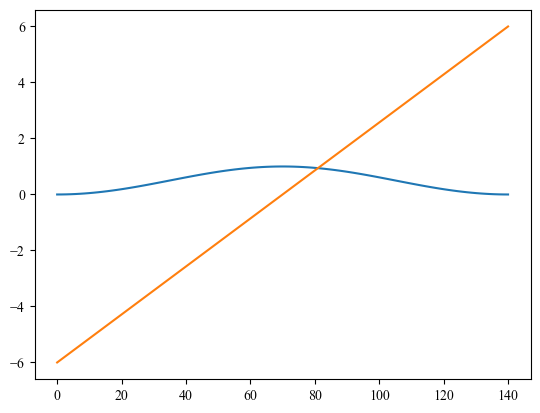

0.9615901398977955


In [78]:
MHz = 2*np.pi
Omega_0 = 1 
Delta_0 = 6 * Omega_0
taumax =140*Omega_0
taulist = np.linspace(0,taumax,100)
args = {"t_max": max(taulist)}

V = 5
#V = 20
rb =(V/(np.sqrt((2*Omega_0)**2+Delta_0**2)))**(1/6)

taulist = np.linspace(0, taumax, 100)
args = {"t_max": max(taulist)}
def Omega(t,args):
    return Omega_0 * np.sin(np.pi * t /args["t_max"]) **2

plt.plot(taulist,Omega(taulist,args))
#plt.show()

def Detla(t,args):
    return Delta_0 * (2 * t/args["t_max"] -1) 



plt.plot(taulist,Detla(taulist,args))
plt.show()
print(rb)

In [79]:
H0 = 0
for n in range(N):
    H0 +=  sx_list[n]
    

    
#psi0 = H0.groundstate()[-1]


psi_list = [basis(2, 0) for n in range(N)]
psi0 = tensor(psi_list)

In [81]:
Hp = 0
rho = 1.5

L = np.sqrt(N/rho)
def generate_random_numbers(L):
    import random
    x = random.uniform(0, L)
    y = random.uniform(0,L)
        
    return x, y

x = [1.0024925174560717,
 0.2173890800859497,
 1.1358925603713992,
 0.8499729342866792]


y = [1.5085054376447788,
 1.0238415065431516,
 1.1170120043689935,
 0.4969851539210329]

for v in range(N):
   
        Hp-= one_list[v] 
H_int = 0
for v in range(N):
    for w in range(N):
        if v != w :
            dist_x = x[v]-x[w]
            dist_y = y[v]-y[w]
            dist = np.sqrt(dist_x**2+dist_y**2)
            #print(dist**6)
            #print(V / (dist)**6)
            H_int +=  0.5*V / (dist)**6 *one_list[v] *  one_list[w]



IndexError: list index out of range

In [82]:

#plt.scatter(x,y)
adg = np.zeros((N,N))

for v in range(N):
    for w in range(N):
        if v != w :
            dist_x = x[v]-x[w]
            dist_y = y[v]-y[w]
            dist = np.sqrt(dist_x**2+dist_y**2)

            if dist<rb:
                adg[v,w] = 1
            if dist>rb:
                adg[v,w] = 0


mat2 = np.array([[0., 1., 0., 1.],
       [1., 0., 1., 1.],
       [0., 1., 0., 1.],
       [1., 1., 1., 0.]])
adg




IndexError: list index out of range

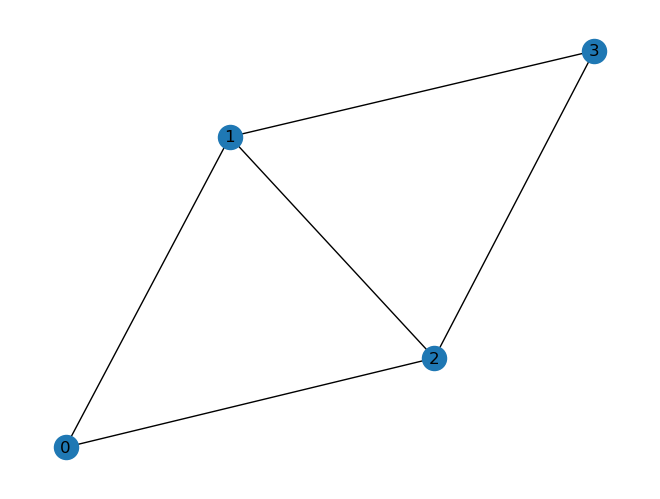

[[0, 3], [1], [2]]

In [137]:





# Create a graph object
G = nx.Graph()

# Add edges to the graph based on the adjacency matrix
num_nodes = len(adg)
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        if adg[i][j] == 1:
            G.add_edge(i, j)

# Plot the graph
nx.draw(G, with_labels=True)
plt.show()
G_ = nx.complement(G)
maximal_cliques = list(nx.find_cliques(G_))
len(maximal_cliques)
maximal_cliques

#psi_reduced


In [138]:
H_t = [[H0,Omega],[Hp,Detla],H_int] 
e_ops = []
result = sesolve(H_t, psi0, taulist,[], args,options = Options(nsteps = 800000))



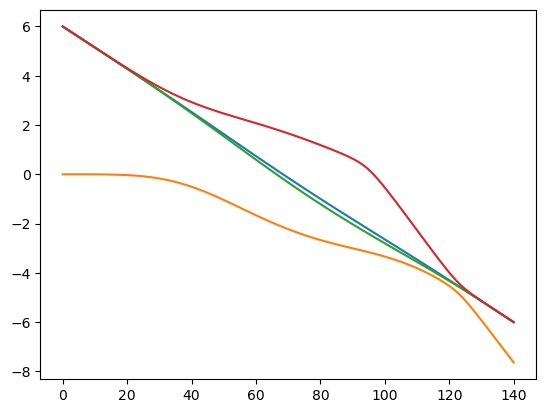

-7.636523903335348

In [139]:
def Hamiltonian(t,args):
    return H0 *Omega(t,args)+ Hp* Detla(t,args)+H_int

eigenvalues = np.zeros((len(taulist), 2**N))
for i, t in enumerate(taulist):
    H =Hamiltonian(t,args)
    eigenvalues[i, :] = H.eigenenergies()

plt.plot(taulist, eigenvalues[:,2], label="Eigenvalue 1")  
plt.plot(taulist, eigenvalues[:,0], label="Eigenvalue 1")  
plt.plot(taulist, eigenvalues[:,1], label="Eigenvalue 1")  
plt.plot(taulist, eigenvalues[:,4], label="Eigenvalue 1")  
plt.show()  
eigenvalues[:,0][-1]

In [140]:
from itertools import product

# Define the digits
digits = [0, 1]

# Generate all combinations
combinations = product(digits, repeat=N)
lst = []
# Print all combinations
for combination in combinations:
    a = (''.join(map(str, combination)))
    lst.append(a)


lst

['0000',
 '0001',
 '0010',
 '0011',
 '0100',
 '0101',
 '0110',
 '0111',
 '1000',
 '1001',
 '1010',
 '1011',
 '1100',
 '1101',
 '1110',
 '1111']

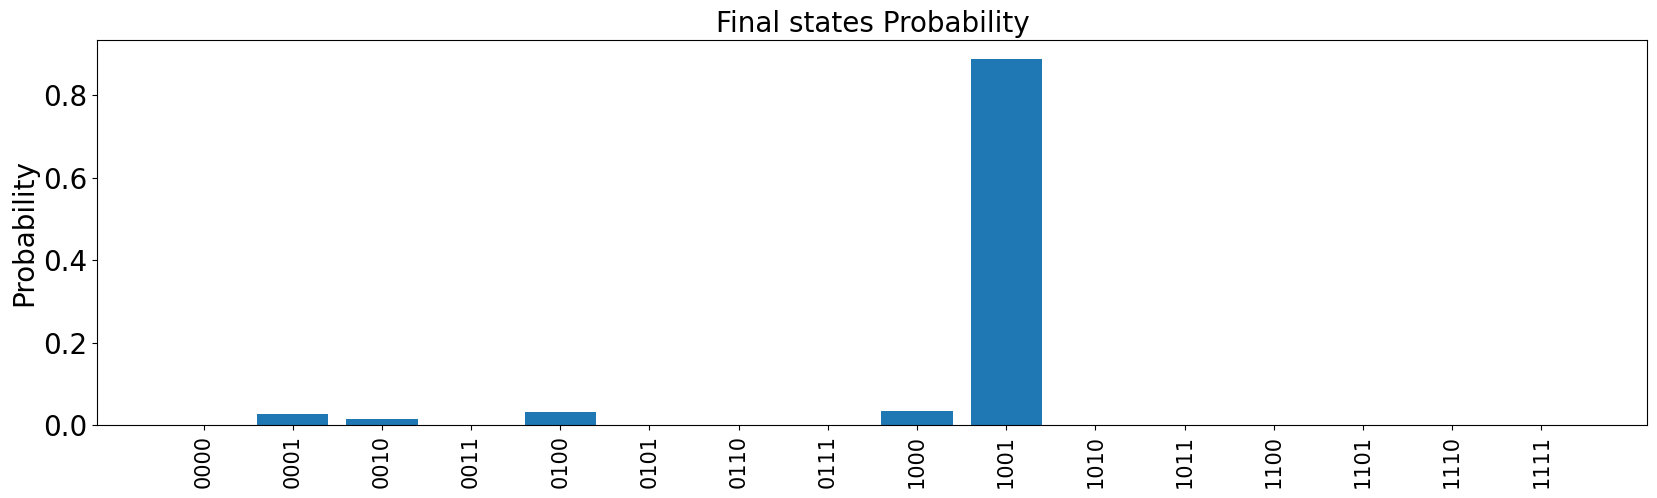

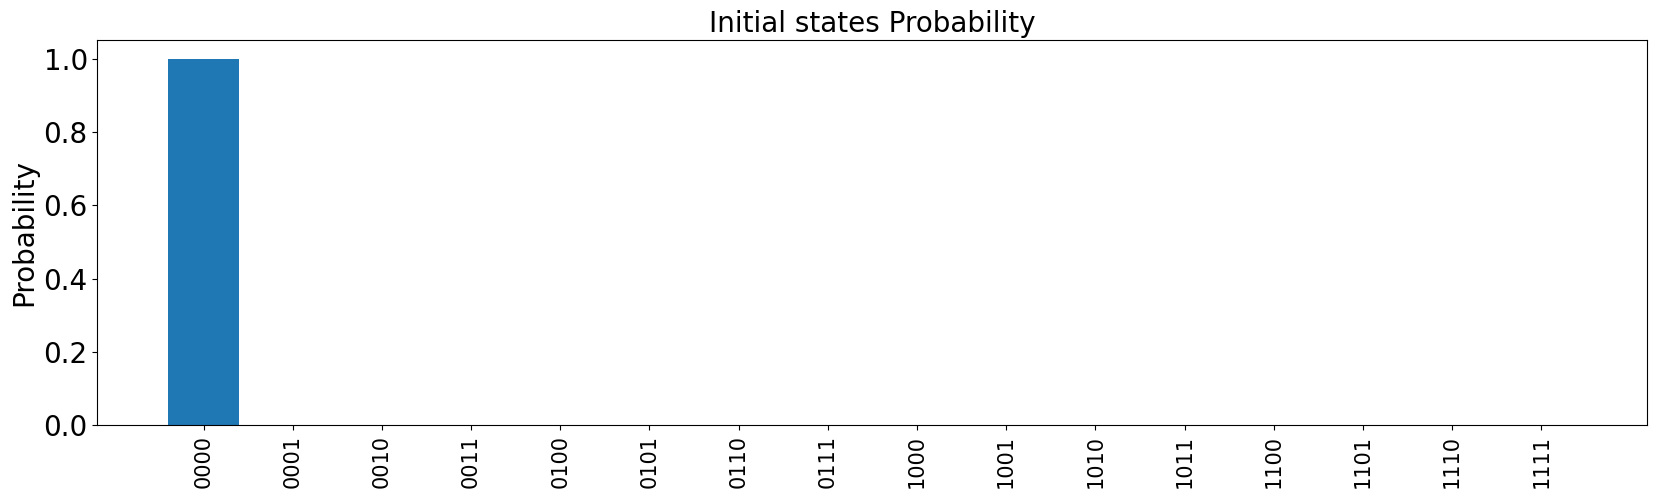

In [141]:
coeff = []
for a_i in result.states[-1].full():
    coeff.append(np.abs(a_i[0])**2)


plt.figure(figsize=(20,5))
plt.bar(lst,coeff)
plt.xticks(fontsize = 15,rotation=90)
plt.yticks(fontsize = 20)
plt.ylabel('Probability',fontsize = 20)
plt.title('Final states Probability',fontsize = 20)
plt.show()


coeff = []
for a_i in psi0.full():
    coeff.append(np.abs(a_i[0])**2)

    
    
plt.figure(figsize=(20,5))
plt.bar(lst,coeff)
plt.xticks(fontsize = 15,rotation=90)
plt.yticks(fontsize = 20)
plt.ylabel('Probability',fontsize = 20)
plt.title('Initial states Probability',fontsize = 20)
plt.show()


In [20]:
def indices_to_binary_strings(indices_list, num_bits):
    binary_strings_list = []
    for indices in indices_list:
        binary_string = ['0'] * num_bits
        for index in indices:
            binary_string[index] = '1'
        binary_strings_list.append([''.join(binary_string)])
    return binary_strings_list


register_list = indices_to_binary_strings(maximal_cliques,N)


def Quantum_State(inx, binary_strings):
    tensor_product = basis(2, int(binary_strings[inx][0][0]))
    for i in range(1, len(binary_strings[inx][0])):
        tensor_product = tensor(tensor_product, basis(2, int(binary_strings[inx][0][i])))
    return Qobj(tensor_product)





H_reduced0 =np.zeros((len(maximal_cliques),(len(maximal_cliques))))
H_reducedp =np.zeros((len(maximal_cliques),(len(maximal_cliques))))
H_reduced_int =np.zeros((len(maximal_cliques),(len(maximal_cliques))))




for i in range(len(maximal_cliques)):
    for j in range(len(maximal_cliques)):
        #print(Quantum_State(i,register_list).dag())
        #print(Quantum_State(j,register_list))
       # print( Quantum_State(i,register_list).dag().full() *H0.full() * Quantum_State(j,register_list).full())
        
        print(Quantum_State(i,register_list).dag().full().dot(H0.full().dot(Quantum_State(j,register_list))))
        H_reduced0[i,j] = Quantum_State(i,register_list).dag().full().dot(H0.full().dot(Quantum_State(j,register_list)))[0][0]
        H_reducedp[i,j] = Quantum_State(i,register_list).dag().full().dot(Hp.full().dot(Quantum_State(j,register_list)))[0][0]
        H_reduced_int[i,j] = Quantum_State(i,register_list).dag().full().dot(H_int.full().dot(Quantum_State(j,register_list)))[0][0]

[[0.+0.j]]
[[0.+0.j]]
[[0.+0.j]]
[[0.+0.j]]
[[0.+0.j]]
[[0.+0.j]]
[[0.+0.j]]
[[0.+0.j]]
[[0.+0.j]]


C:\Users\owner\AppData\Local\Temp\ipykernel_29220\1193430316.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
  H_reduced0[i,j] = Quantum_State(i,register_list).dag().full().dot(H0.full().dot(Quantum_State(j,register_list)))[0][0]
C:\Users\owner\AppData\Local\Temp\ipykernel_29220\1193430316.py:39: ComplexWarning: Casting complex values to real discards the imaginary part
  H_reducedp[i,j] = Quantum_State(i,register_list).dag().full().dot(Hp.full().dot(Quantum_State(j,register_list)))[0][0]
C:\Users\owner\AppData\Local\Temp\ipykernel_29220\1193430316.py:40: ComplexWarning: Casting complex values to real discards the imaginary part
  H_reduced_int[i,j] = Quantum_State(i,register_list).dag().full().dot(H_int.full().dot(Quantum_State(j,register_list)))[0][0]


In [18]:
def Hamiltonian(t,args):
    return Qobj(H_reduced0) *Omega(t,args)+ Qobj(H_reducedp)* Detla(t,args)

H_t_reduced = [[Qobj(H_reduced0),Omega],[Qobj(H_reducedp),Detla]] 
e_ops = Hamiltonian(t,args)
psi0 = basis(3,0)
result = sesolve(H_t_reduced, psi0, taulist,[], args,options = Options(nsteps = 600000))
result.states[-1]

Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[1.-6.83509286e-05j]
 [0.+0.00000000e+00j]
 [0.+0.00000000e+00j]]

-9.457666879816735

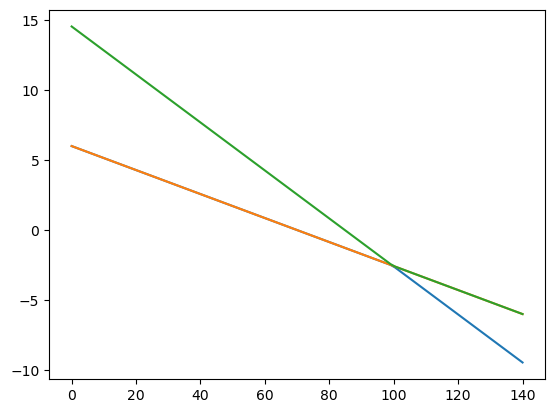

In [22]:
def Hamiltonian(t,args):
    return Qobj(H_reduced0) *Omega(t,args)+ Qobj(H_reducedp)* Detla(t,args)+H_reduced_int

eigenvalues = np.zeros((len(taulist), 3))
for i, t in enumerate(taulist):
    H =Hamiltonian(t,args)
    eigenvalues[i, :] = H.eigenenergies()

#plt.plot(taulist, eigenvalues[:], label="Eigenvalue 1")  
plt.plot(taulist, eigenvalues[:,0], label="Eigenvalue 1")  
plt.plot(taulist, eigenvalues[:,1], label="Eigenvalue 1")  
plt.plot(taulist, eigenvalues[:,2], label="Eigenvalue 1")  

eigenvalues[:,0][-1]

Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0.]]

In [465]:
zero = basis(2,0)
one = basis(2,1)
tensor(zero,tensor(zero,tensor(one,zero))) == Quantum_State(2,register_list)

True

In [24]:
H_reduced_int

array([[0.        , 0.        , 0.        ],
       [0.        , 2.54233312, 0.        ],
       [0.        , 0.        , 0.        ]])

In [68]:
H_reduced_int * 

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [400]:
Quantum_State(1, register_list).full()

array([[0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]])

In [67]:
H_reduced0

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [403]:
Hp

Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.  -1.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.  -1.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.  -3.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.  -1.5  0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.  -3.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -3.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -4.5  0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -1.5  0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  -3.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.

In [71]:
def decimal_to_binary(dec): 
    decimal = int(dec) 
 
    # Prints equivalent decimal 
    print(decimal, " in Binary : ", bin(decimal))

In [80]:
for i in range(2**N):

    decimal_to_binary(i)[1]

0  in Binary :  0b0


TypeError: 'NoneType' object is not subscriptable

In [ ]:
import numpy as np
from qutip import*
import matplotlib.pyplot as plt
import networkx as nx
N =4
zero = basis(2,0)
one = basis(2,1)
si = qeye(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()

sx_list = []
sy_list = []
sz_list = []
one_list = []

for n in range(N):
    op_list = []
    for m in range(N):
        op_list.append(si)

    op_list[n] = sx
    sx_list.append(tensor(op_list))

    op_list[n] = sz
    sz_list.append(tensor(op_list))

    op_list[n] = one*one.dag()
    one_list.append(tensor(op_list))